In [88]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
# students_grading  = pd.read_csv("/kaggle/input/students-grading-dataset/Students_Grading_Dataset.csv"
#                           )
# students_grading.info()
# sns.histplot(students_grading["Department"], kde=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              5000 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             5000 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

In [119]:
students_grading  = pd.read_csv("/kaggle/input/students-grading-dataset/Students_Grading_Dataset_Biased.csv")
                         # ,usecols = ["Age","Total_Score","Study_Hours_per_Week" ,"Student_ID" ,"Attendance (%)","Extracurricular_Activities","Stress_Level (1-10)","Internet_Access_at_Home","Department","Sleep_Hours_per_Night","Participation_Score","Grade"]    )
students_grading.head()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,...,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,...,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,...,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,...,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,...,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1


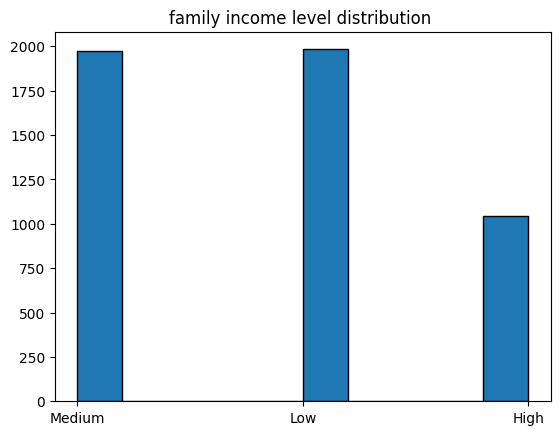

In [134]:
plt.hist(students_grading["Family_Income_Level"],edgecolor='black')
plt.title("family income level distribution ")
plt.show() 

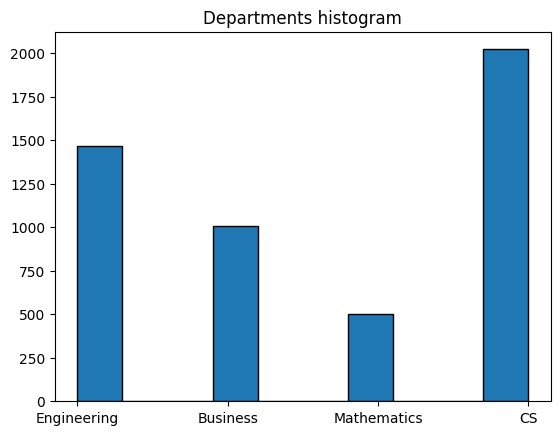

In [135]:
plt.hist(students_grading["Department"],edgecolor='black')
plt.title("Departments histogram")
plt.show() 

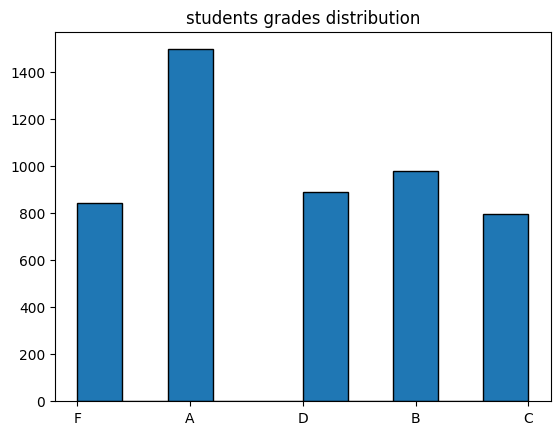

In [136]:
plt.hist(students_grading["Grade"],edgecolor='black')
plt.title("students grades distribution")
plt.show() 

Text(0, 0.5, 'Frequency')

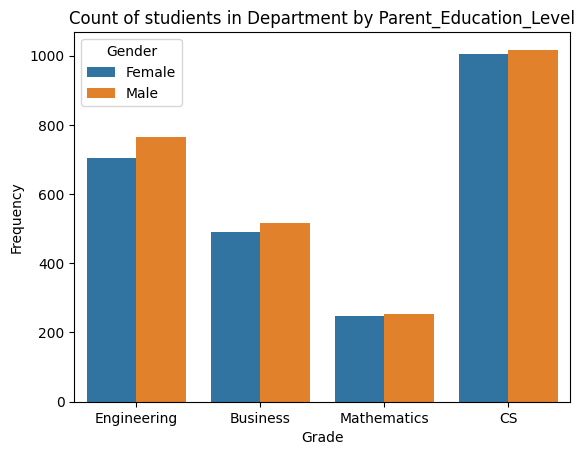

In [132]:
sns.countplot(data=students_grading, x='Department', hue = 'Gender')
plt.title('gender distribution over each depatrment')
plt.xlabel('Grade')
plt.ylabel('Frequency')

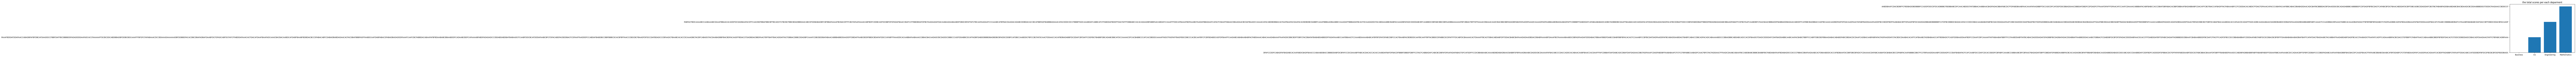

In [86]:
scores_per_department = students_grading[["Department","Grade"]].groupby("Department").sum().reset_index()
plt.bar(scores_per_department["Department"],scores_per_department["Grade"])
plt.title("the total scores per each deparment")
plt.show()

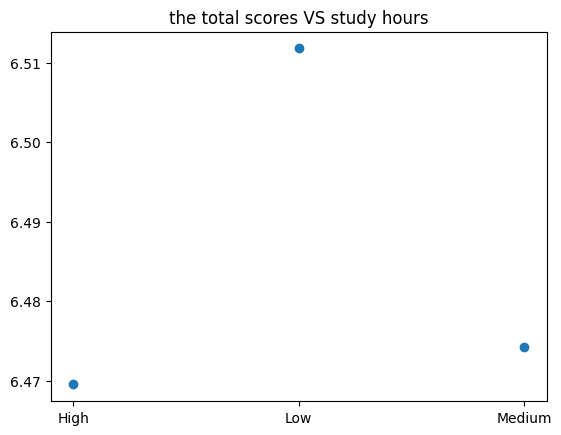

In [130]:
scores_and_studyHours = students_grading[["Family_Income_Level","Sleep_Hours_per_Night"]].groupby("Family_Income_Level").mean().reset_index()
plt.scatter( scores_and_studyHours["Family_Income_Level"], scores_and_studyHours["Sleep_Hours_per_Night"])
plt.title("the total scores VS study hours")
plt.show()

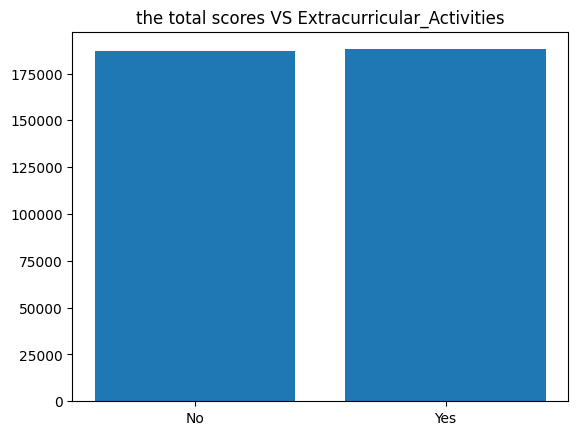

In [75]:
scores_and_Activities = students_grading[["Extracurricular_Activities","Total_Score"]].groupby("Extracurricular_Activities").mean().reset_index()
plt.bar(scores_and_Activities["Extracurricular_Activities"],scores_and_Activities["Total_Score"])
plt.title("the total scores VS Extracurricular_Activities")
plt.show()

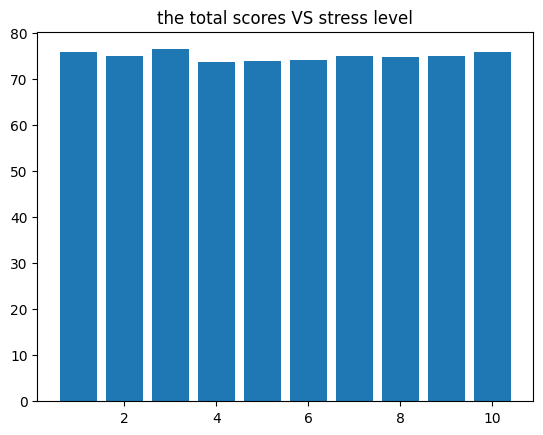

In [78]:
scores_and_stressLevel = students_grading[["Stress_Level (1-10)","Total_Score"]].groupby("Stress_Level (1-10)").mean().reset_index()
plt.bar(scores_and_stressLevel["Stress_Level (1-10)"],scores_and_stressLevel["Total_Score"])
plt.title("the total scores VS stress level")
plt.show()

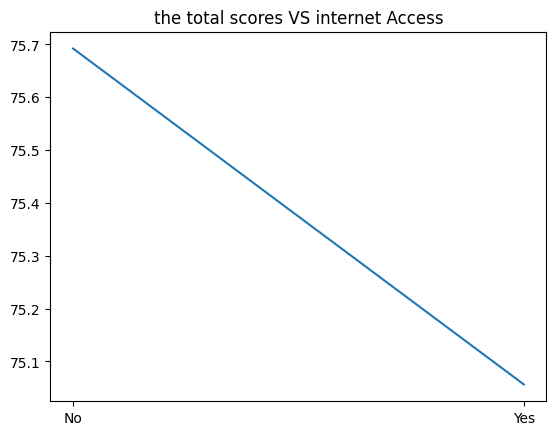

In [66]:
scores_and_internetAccess= students_grading[["Internet_Access_at_Home","Total_Score"]].groupby("Internet_Access_at_Home").mean().reset_index()
plt.plot(scores_and_internetAccess["Internet_Access_at_Home"],scores_and_internetAccess["Total_Score"])
plt.title("the total scores VS internet Access")
plt.show()

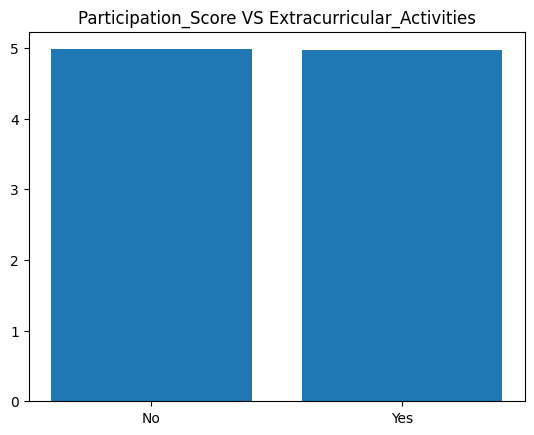

In [67]:
scores_and_participation  = students_grading[["Extracurricular_Activities","Participation_Score"]].groupby("Extracurricular_Activities").mean().reset_index()
plt.bar(scores_and_participation["Extracurricular_Activities"],scores_and_participation["Participation_Score"])
plt.title("Participation_Score VS Extracurricular_Activities")
plt.show()

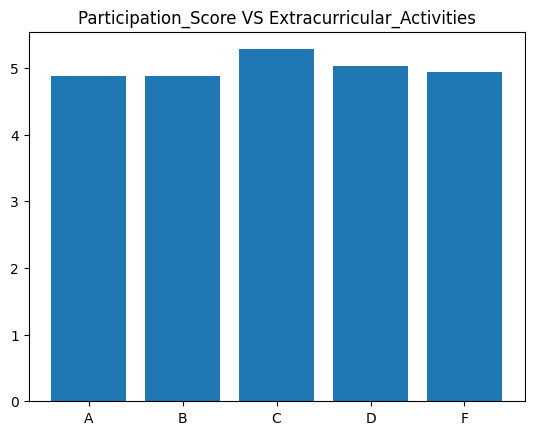

In [87]:
scores_and_participation  = students_grading[["Grade","Participation_Score"]].groupby("Grade").mean().reset_index()
plt.bar(scores_and_participation["Grade"],scores_and_participation["Participation_Score"])
plt.title("Participation_Score VS Extracurricular_Activities")
plt.show()